In [132]:
# conda install scikit-learn pandas matplotlib seaborn

## Introduction

The purpose of this notebook is to perform a binary classification of network intrusion from the KDD Cup 1999 dataset utilizing various machine learning algorithms.

## Data exploration and Preparation

The dataset is loaded using pandas from its CSV file location and columns are renamed for clarity

In [7]:
import pandas as pd
df = pd.read_csv("kddcup.data_10_percent_corrected.csv")

In [8]:
def column_names():
    """Reads column names for dataframe into array"""
    f = open("kddcup.names.txt")
    s = f.read()
    arr = s.split("\n")[1:-1]
    cols = [a[0:a.index(":")] for a in arr]
    cols.append("target")
    return cols

cols = column_names()
df.columns = cols
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


## Data Preprocessing
This section of the notebook prepares the dataset for machine learning by standardizing and encoding the data appropriately, eliminating redundancy, and ensuring data integrity.

In [10]:
originalcols = df.columns

Preprocessing functions are written to normalize numerical features to have a mean of zero and standard deviation of one as well as encoded categorical text features into numerical repressentations with OrdinalEncoder.



In [11]:
# Encode a numeric column as zscores
def zscore_normalization(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

from sklearn.preprocessing import OrdinalEncoder

# Encode categorical values
def encode_text(df, name):
    enc = OrdinalEncoder()
    # dummies = pd.get_dummies(df[name])
    data = enc.fit_transform(df[name].values.reshape(-1,1))
    df[name]=data.flatten()

In [32]:
for col in df.columns:
    t = (df[col].dtype)
    if t == int or t == float:
        zscore_normalization(df, col)
    else:
        encode_text(df, col)

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,-0.090604,1.0,22.0,9.0,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.600016,0.599396,-0.282867,-1.146738,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,11.0
1,-0.090604,1.0,22.0,9.0,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.505712,0.599396,-0.282867,-1.188292,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,11.0
2,-0.090604,1.0,22.0,9.0,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.411408,0.599396,-0.282867,-1.188292,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,11.0
3,-0.090604,1.0,22.0,9.0,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.317104,0.599396,-0.282867,-1.209068,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,11.0
4,-0.090604,1.0,22.0,9.0,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.222800,0.599396,-0.282867,-1.209068,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.090604,1.0,22.0,9.0,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625555,0.599396,-0.282867,-1.229845,1.028091,-0.464418,-0.436950,-0.25204,-0.249464,11.0
494016,-0.090604,1.0,22.0,9.0,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625555,0.599396,-0.282867,-0.897418,1.028091,-0.464418,-0.436950,-0.25204,-0.249464,11.0
494017,-0.090604,1.0,22.0,9.0,-0.002856,0.010033,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625555,0.599396,-0.282867,-1.125962,1.028091,-0.306769,-0.436950,-0.25204,-0.249464,11.0
494018,-0.090604,1.0,22.0,9.0,-0.002767,0.010033,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625555,0.599396,-0.282867,-1.167515,1.028091,-0.359319,-0.436950,-0.25204,-0.249464,11.0


Preprocessing functions are applied to relevant columns, preparing them for modeling.

In [139]:
# Columns with one unique value are removed from the dataframe.

for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col, inplace=True,axis=1)

In [140]:
len(df.columns)

40

In [141]:
df["outcome"].value_counts()

outcome
smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

Encoding the outcomes into binary representations for abnormal and normal outcomes, ensuring binary classification

In [142]:
df.loc[df['outcome'] != "normal.", 'outcome']  = 1
df.loc[df['outcome'] == "normal.", 'outcome']  = 0
df["outcome"].value_counts()

outcome
1    396743
0     97277
Name: count, dtype: int64

In [143]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,-0.067792,1.0,22.0,9.0,-0.002820,-0.011578,0.0,-0.04772,-0.002571,-0.044136,...,-1.600016,0.599396,-0.282867,-1.146738,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,0
1,-0.067792,1.0,22.0,9.0,-0.002824,0.014179,0.0,-0.04772,-0.002571,-0.044136,...,-1.505712,0.599396,-0.282867,-1.188292,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,0
2,-0.067792,1.0,22.0,9.0,-0.002840,0.014179,0.0,-0.04772,-0.002571,-0.044136,...,-1.411408,0.599396,-0.282867,-1.188292,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,0
3,-0.067792,1.0,22.0,9.0,-0.002842,0.035214,0.0,-0.04772,-0.002571,-0.044136,...,-1.317104,0.599396,-0.282867,-1.209068,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,0
4,-0.067792,1.0,22.0,9.0,-0.002842,0.035214,0.0,-0.04772,-0.002571,-0.044136,...,-1.222800,0.599396,-0.282867,-1.209068,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.067792,1.0,22.0,9.0,-0.002748,0.030644,0.0,-0.04772,-0.002571,-0.044136,...,0.625555,0.599396,-0.282867,-1.229845,1.028091,-0.464418,-0.436950,-0.25204,-0.249464,0
494016,-0.067792,1.0,22.0,9.0,-0.002776,0.042902,0.0,-0.04772,-0.002571,-0.044136,...,0.625555,0.599396,-0.282867,-0.897418,1.028091,-0.464418,-0.436950,-0.25204,-0.249464,0
494017,-0.067792,1.0,22.0,9.0,-0.002856,0.010033,0.0,-0.04772,-0.002571,-0.044136,...,0.625555,0.599396,-0.282867,-1.125962,1.028091,-0.306769,-0.436950,-0.25204,-0.249464,0
494018,-0.067792,1.0,22.0,9.0,-0.002767,0.010033,0.0,-0.04772,-0.002571,-0.044136,...,0.625555,0.599396,-0.282867,-1.167515,1.028091,-0.359319,-0.436950,-0.25204,-0.249464,0


## Feature Engineering
This section aims to identify and eliminate features that have little correlation on outcome, increasing model performance.

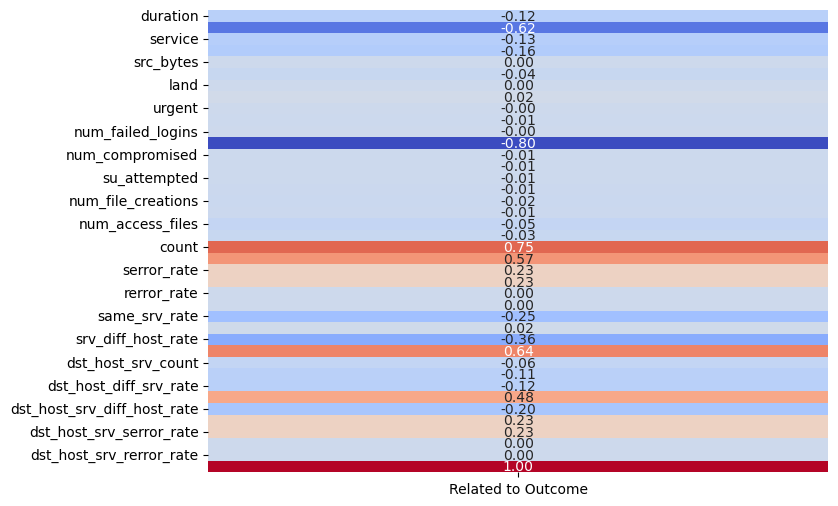

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df
encode_text(df2, 'outcome')

#Computer correlation between all features and outcome variable
correlation = df2.corrwith(df2['outcome'])

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation, columns=['Related to Outcome']), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.yticks(rotation=0)
plt.show()

In [145]:
correlation

duration                      -0.118015
protocol_type                 -0.616600
service                       -0.131724
flag                          -0.155671
src_bytes                      0.000936
dst_bytes                     -0.037709
land                           0.002542
wrong_fragment                 0.023629
urgent                        -0.001498
hot                           -0.006327
num_failed_logins             -0.001060
logged_in                     -0.795280
num_compromised               -0.005046
root_shell                    -0.005871
su_attempted                  -0.008789
num_root                      -0.011006
num_file_creations            -0.018671
num_shells                    -0.014951
num_access_files              -0.054268
is_guest_login                -0.032300
count                          0.752977
srv_count                      0.566828
serror_rate                    0.227739
srv_serror_rate                0.227188
rerror_rate                    0.003189


Features with outcome correlations lower than 0.05 are eliminated from the dataset

In [146]:
row = 0
for num in correlation:
 if num >= -0.05 and num <= 0.05:
     df2.drop(df2.columns[row], axis=1, inplace=True)
     row += 1

df2

,protocol_type,flag,dst_bytes,wrong_fragment,hot,logged_in,root_shell,num_root,num_shells,is_guest_login,...,srv_serror_rate,srv_rerror_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,1.0,9.0,-0.011578,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.463521,-0.248631,-0.255243,-3.297125,0.599396,-1.146738,-0.464418,-0.25204,-0.249464,0.0
1,1.0,9.0,0.014179,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.463521,-0.248631,-0.255243,-3.142672,0.599396,-1.188292,-0.464418,-0.25204,-0.249464,0.0
2,1.0,9.0,0.014179,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.463521,-0.248631,-0.255243,-2.988219,0.599396,-1.188292,-0.464418,-0.25204,-0.249464,0.0
3,1.0,9.0,0.035214,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.463521,-0.248631,-0.255243,-2.833766,0.599396,-1.209068,-0.464418,-0.25204,-0.249464,0.0
4,1.0,9.0,0.035214,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.463521,-0.248631,-0.255243,-2.679313,0.599396,-1.209068,-0.464418,-0.25204,-0.249464,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,1.0,9.0,0.030644,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.463521,-0.248631,-0.255243,-2.262290,0.599396,-1.229845,-0.464418,-0.25204,-0.249464,0.0
494016,1.0,9.0,0.042902,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.463521,-0.248631,-0.255243,-3.497913,0.599396,-0.897418,-0.464418,-0.25204,-0.249464,0.0
494017,1.0,9.0,0.010033,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.174819,-0.248631,-0.255243,-3.343460,0.599396,-1.125962,-0.306769,-0.25204,-0.249464,0.0
494018,1.0,9.0,0.010033,-0.04772,-0.044136,1.0,-0.010552,-0.00564,-0.009919,0.0,...,-0.463521,-0.248631,-0.255243,-3.189008,0.599396,-1.167515,-0.359319,-0.25204,-0.249464,0.0


In [152]:
for col in originalcols:
    if col not in df2.columns:
        print(col)

duration
service
src_bytes
land
urgent
num_failed_logins
num_compromised
su_attempted
num_file_creations
num_access_files
num_outbound_cmds
is_host_login
count
serror_rate
rerror_rate
same_srv_rate
srv_diff_host_rate
dst_host_srv_count
dst_host_diff_srv_rate
dst_host_srv_diff_host_rate
dst_host_srv_serror_rate


In [153]:
df=df2
df["outcome"].value_counts()

outcome
1.0    396743
0.0     97277
Name: count, dtype: int64

## Model Training and Testing
This section focuses on selecting and implementing appropriate models, training them on the preprocessed dataset, and producing evaluation metrics.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import time
import numpy as np

In [95]:
#Split data in training and testing sets
X = df.drop(columns=["outcome"])
y = df["outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
# Create dataframe to store evaluation metrics 
accuracies = pd.DataFrame(columns=["Model", "Accuracy", "F1", "Precision", "Recall"])
accuracies

,Model,Accuracy,F1,Precision,Recall


In [97]:
#Create dataframe to store training and testing times
times = pd.DataFrame(columns=["Model", "Train", "Test"])
times

,Model,Train,Test


### 1. Logistic Regression

In [99]:
start_train = time.time()
lrc = LogisticRegression(random_state=0, max_iter=1000)

lrc.fit(X_train, y_train)
end_train = time.time()

start_test = time.time()
ypredlr = lrc.predict(X_test)
end_test = time.time()

print("Train time:", end_train-start_train)
print("Test time:", end_test-start_test)

times.loc[len(times.index)] = ['Logistic Regression',end_train-start_train, end_test-start_test]

Train time: 3.3383092880249023
Test time: 0.01250004768371582


In [100]:
accuracy = accuracy_score(y_test, ypredlr)

f1 = f1_score(y_test, ypredlr)

precision = precision_score(y_test, ypredlr)

recall = recall_score(y_test, ypredlr)

accuracies.loc[len(accuracies.index)] = ['Logistic Regression', accuracy, f1, precision, recall]


In [101]:
#Cross Validation
# cross_val_score(lrc, X, y, cv=10)

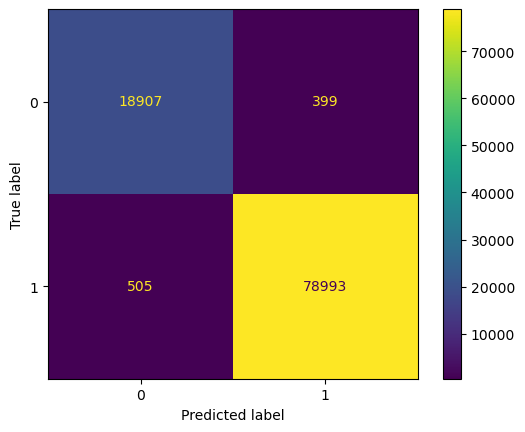

In [102]:
ConfusionMatrixDisplay(confusion_matrix(y_test, ypredlr)).plot()

### 2. Random Forest Classifier

In [103]:
start_train = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
end_train = time.time()

start_test = time.time()
y_pred2=rfc.predict(X_test)
end_test = time.time()

print("Train time:", end_train-start_train)
print("Test time:", end_test-start_test)

times.loc[len(times.index)] = ['Random Forest Classifier',end_train-start_train, end_test-start_test]

Train time: 15.257185459136963
Test time: 0.3828160762786865


In [104]:
accuracy = accuracy_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)

accuracies.loc[len(accuracies.index)] = ['Random Forest Classifier', accuracy, f1, precision, recall] 

In [105]:
#Cross Validation
# cross_val_score(rfc, X, y, cv=5)

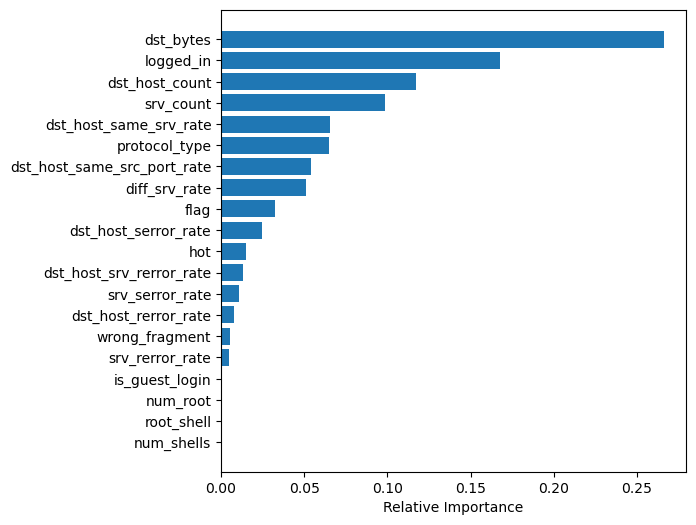

In [106]:
importances = (rfc.feature_importances_)
i = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(i)), importances[i], align='center')
plt.yticks(range(len(i)), [df.columns[j] for j in i])
plt.xlabel('Relative Importance')
plt.show()

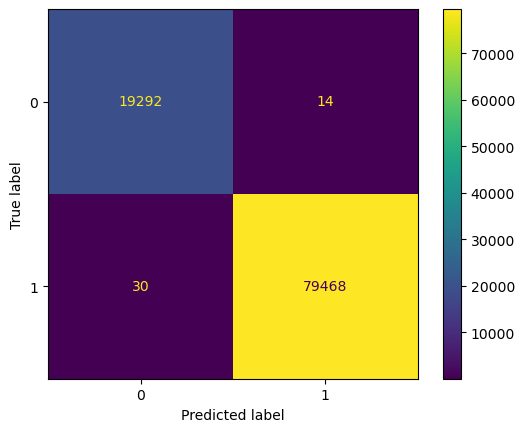

In [107]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2)).plot()

### 3. Decision Trees

In [108]:
start_train = time.time()
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
end_train = time.time()

start_test = time.time()
y_pred3=dtc.predict(X_test)
end_test = time.time()

print("Train time:", end_train-start_train)
print("Test time:", end_test-start_test)

times.loc[len(times.index)] = ['Decision Tree',end_train-start_train, end_test-start_test]

Train time: 0.9039111137390137
Test time: 0.013958930969238281


In [109]:
accuracy = accuracy_score(y_test,y_pred3)
f1 = f1_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)

accuracies.loc[len(accuracies.index)] = ['Decision Tree', accuracy, f1, precision, recall] 

In [110]:
#Cross Validation
# cross_val_score(dtc, X, y, cv=5)

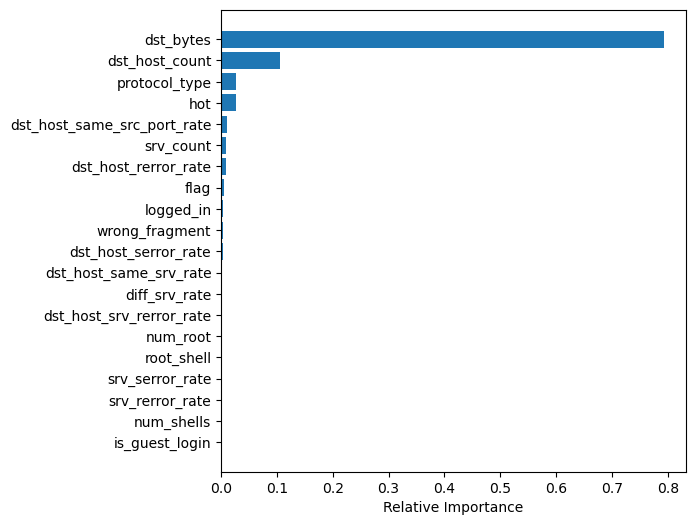

In [111]:
importances = (dtc.feature_importances_)
i = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(i)), importances[i], align='center')
plt.yticks(range(len(i)), [df.columns[j] for j in i])
plt.xlabel('Relative Importance')
plt.show()

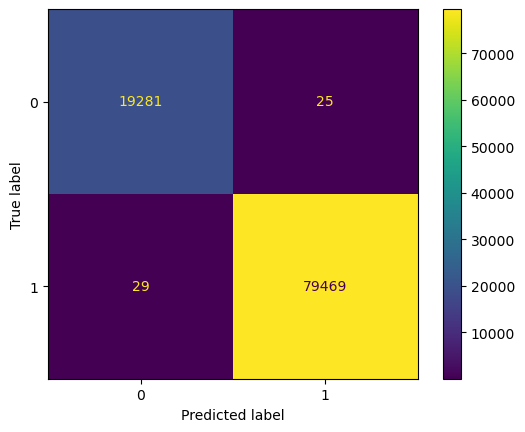

In [112]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred3)).plot()

### 4. SVM

In [113]:
start_train = time.time()
svc = SVC()
svc.fit(X_train, y_train)
end_train = time.time()

start_test = time.time()
y_pred4=svc.predict(X_test)
end_test = time.time()

print("Train time:", end_train-start_train)
print("Test time:", end_test-start_test)

times.loc[len(times.index)] = ['Support Vector Machine',end_train-start_train, end_test-start_test]

Train time: 573.8090128898621
Test time: 21.202878713607788


In [114]:
accuracy = accuracy_score(y_test,y_pred4)
f1 = f1_score(y_test,y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
accuracies.loc[len(accuracies.index)] = ['Support Vector Machine', accuracy, f1, precision, recall] 

In [115]:
# #Cross Validation
# cross_val_score(svc, X, y, cv=5)

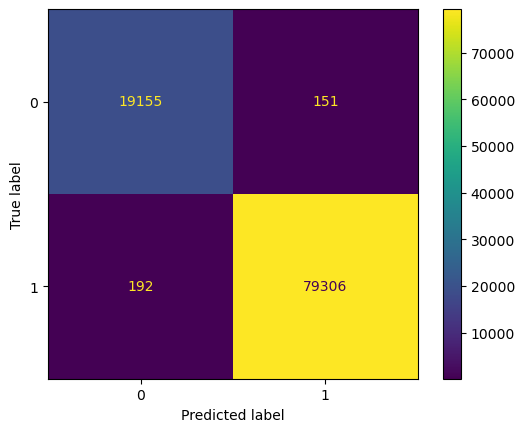

In [116]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred4)).plot()

### 5. Gradient Boost

In [117]:
start_train = time.time()
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
end_train = time.time()

start_test = time.time()
y_pred5=gbc.predict(X_test)
end_test = time.time()

print("Train time:", end_train-start_train)
print("Test time:", end_test-start_test)

times.loc[len(times.index)] = ['Gradient Boost',end_train-start_train, end_test-start_test]

Train time: 26.349640607833862
Test time: 0.1104128360748291


In [118]:
accuracy = accuracy_score(y_test,y_pred5)
f1 = f1_score(y_test, y_pred5)

precision = precision_score(y_test, y_pred5)
recall = (recall_score(y_test, y_pred5))

accuracies.loc[len(accuracies.index)] = ['Gradient Boost', accuracy, f1, precision, recall] 

In [119]:
#Cross Validation
# cross_val_score(gbc, X, y, cv=5)

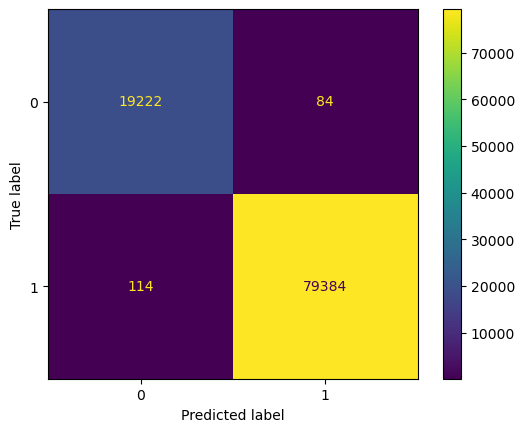

In [120]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred5)).plot()

### 6. Gaussian Naive Bayes

In [121]:
start_train = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
end_train = time.time()

start_test = time.time()
y_pred6=gnb.predict(X_test)
end_test = time.time()

print("Train time:", end_train-start_train)
print("Test time:", end_test-start_test)

times.loc[len(times.index)] = ['Gaussian Naive Bayes',end_train-start_train, end_test-start_test]

Train time: 0.18327569961547852
Test time: 0.030280351638793945


In [123]:
accuracy = accuracy_score(y_test,y_pred6)
f1 = f1_score(y_test, y_pred6)
precision = precision_score(y_test,y_pred6)
recall = recall_score(y_test, y_pred6)

accuracies.loc[len(accuracies.index)] = ['Gaussian Naive Bayes', accuracy, f1, precision, recall] 

In [124]:
#Cross Validation
# cross_val_score(gnb, X, y, cv=5)

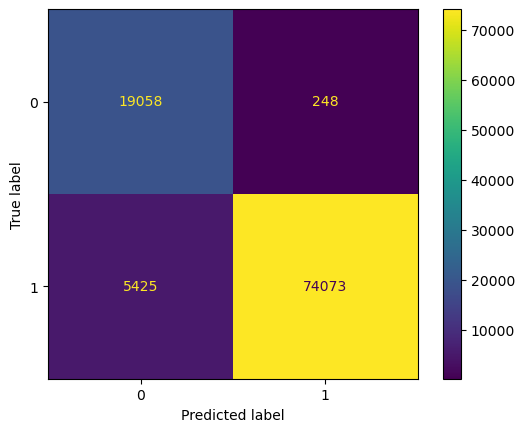

In [125]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred6)).plot()

### 7. Artificial Neural Network

This section of the notebook utilizes tensorflow and keraas to construct an Artificial Neural Network. The ANN is defined with three layers and compiled with the adam optimizer and mean absolute error loss function 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1344      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      


                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25
1544/1544 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9927 - val_loss: 0.0276 - val_accuracy: 0.9959
Epoch 2/25
1544/1544 [==============================] - 4s 3ms/step - loss: 0.0188 - accuracy: 0.9961 - val_loss: 0.0181 - val_accuracy: 0.9959
Epoch 3/25
1544/1544 [==============================] - 4s 3ms/step - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.0133 - val_accuracy: 0.9956
Epoch 4/25
1544/1544 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0227 - val_accuracy: 0.9961
Epoch 5/25
1544/1544 [==============================] - 4s 3ms/step - loss: 0.0127 - ac

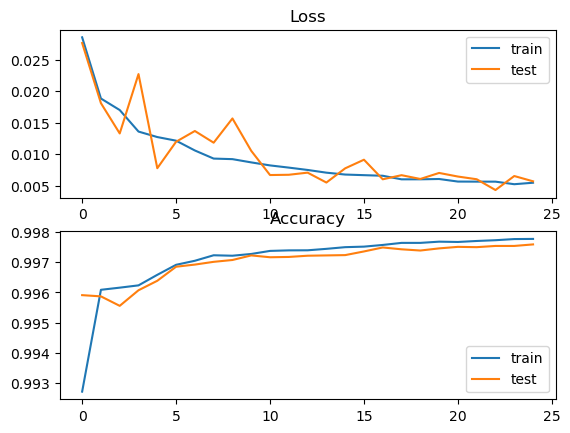

In [154]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import classification_report


input_shape = [X_train.shape[1]]

start_train = time.time()

model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.build()

print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])  

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=256, epochs=25,)

end_train=time.time()
accuracy = model.evaluate(X_test, y_test)[1]
report = classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Plot loss and accuracy
plt.figure(figsize=(12, 6))

# Plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()
plt.show()

In [128]:
accuracy = history.history['accuracy'][11]

accuracies.loc[len(accuracies.index)] = ['ANN', accuracy, 0, 0, 0] 

### View Model Accuracies

In [129]:
accuracies.drop_duplicates(subset="Model",inplace=True)    
print(accuracies)

                      Model  Accuracy        F1  Precision    Recall
0       Logistic Regression  0.990851  0.994311   0.994974  0.993648
1  Random Forest Classifier  0.999555  0.999723   0.999824  0.999623
2             Decision Tree  0.999453  0.999660   0.999686  0.999635
3    Support Vector Machine  0.996528  0.997842   0.998100  0.997585
4            Gradient Boost  0.997996  0.998754   0.998943  0.998566
5      Gaussian Naive Bayes  0.942583  0.963119   0.996663  0.931759
6                       ANN  0.997394  0.000000   0.000000  0.000000


<Axes: xlabel='Model'>

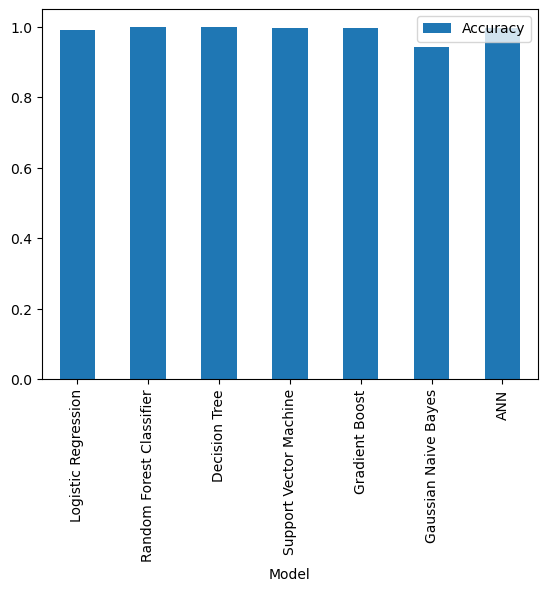

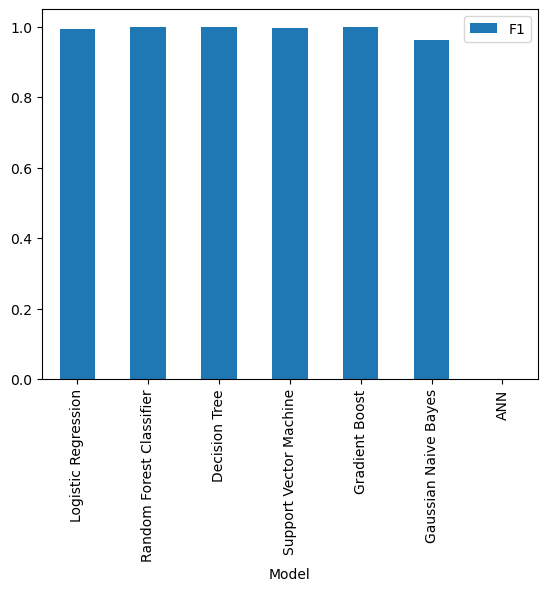

In [130]:
accuracies.plot(kind='bar', x='Model', y='Accuracy')
accuracies.plot(kind='bar', x='Model', y='F1')

In [131]:
print(times)

                      Model       Train       Test
0       Logistic Regression    3.338309   0.012500
1  Random Forest Classifier   15.257185   0.382816
2             Decision Tree    0.903911   0.013959
3    Support Vector Machine  573.809013  21.202879
4            Gradient Boost   26.349641   0.110413
5      Gaussian Naive Bayes    0.183276   0.030280
6                       ANN   49.101943  49.101943
